# 1. Authenticate & Import

In [1]:
import ee
# 网不好的时候自动重试ee.Initialize()
print("Try init ee...", end=" ")
eeInited, tryCounts = False, 0
while not eeInited:
    print("%d" % tryCounts, end=" ")
    try:
        ee.Initialize()
    except Exception as e:
        if (str(e)[0:23]=="Please authorize access"):
            ee.Authenticate()
        tryCounts += 1
    else:
        eeInited = True
        print("\nee initialized!")

import geemap

Try init ee... 0 
ee initialized!


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import gc
import time
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import cv2

import gdal
import utils
import common
import dataset
import GetMapTiles
from models.ResNet import ResNet101

# 2. Import Earth Engine Data

In [3]:
# Boundary and Grid-----------------------------------------------------------------------------------------------------
worldBoundary = ee.FeatureCollection("users/liuph/shape/WorldBoundary")
ChinaBoundary = ee.FeatureCollection("users/410093033/China")
WorldGrid5d = ee.FeatureCollection("users/liuph/shape/WorldGrid5dC5")

# Fusion of landcover products------------------------------------------------------------------------------------------
# forest_fuse = forest_gong.add(forest_ygs).add(forest_liu).add(forest_chen).add(forest_hs).rename("ForestFuse")
# forest_fuse = ee.ImageCollection('users/sysushiqian/forestFuse2020').min().rename("forest_fuse")
forest_fuse = ee.ImageCollection('users/sysushiqian/forestFuse2020_new').min().rename("ForestFuse")

# 3. Prepare CNN model & data path

In [4]:
ckptPath = r"./CKPT/ResNet101_GE17_totalSample/ckpt.pth"

model = ResNet101(in_ch=3, n_classes=5)
model.to(torch.device('cuda:0'))
assert os.path.exists(ckptPath), "ckpt dosen't exists"
ckpt = torch.load(ckptPath, map_location=torch.device('cuda:0'))
model.load_state_dict(ckpt["model"])
# model = nn.DataParallel(model, device_ids=(0, ))

<All keys matched successfully>

# 4. dense prediction by grid index list


[Grid5d=525 Grid01d=1] Mon Dec 28 15:40:34 2020
--------------------------------------------------------------------------------
grid01d 1 already processed, jump to next


[Grid5d=525 Grid01d=2] Mon Dec 28 15:40:35 2020
--------------------------------------------------------------------------------
grid01d 2 already processed, jump to next


[Grid5d=525 Grid01d=3] Mon Dec 28 15:40:35 2020
--------------------------------------------------------------------------------
grid01d 3 already processed, jump to next


[Grid5d=525 Grid01d=4] Mon Dec 28 15:40:36 2020
--------------------------------------------------------------------------------
grid01d 4 already processed, jump to next


[Grid5d=525 Grid01d=5] Mon Dec 28 15:40:36 2020
--------------------------------------------------------------------------------
grid01d 5 already processed, jump to next


[Grid5d=525 Grid01d=6] Mon Dec 28 15:40:36 2020
--------------------------------------------------------------------------------
grid0

Grid01d=65: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:11<00:00,  5.83it/s]


prediction saved! path: ./densePred/densePred_529_65.tif



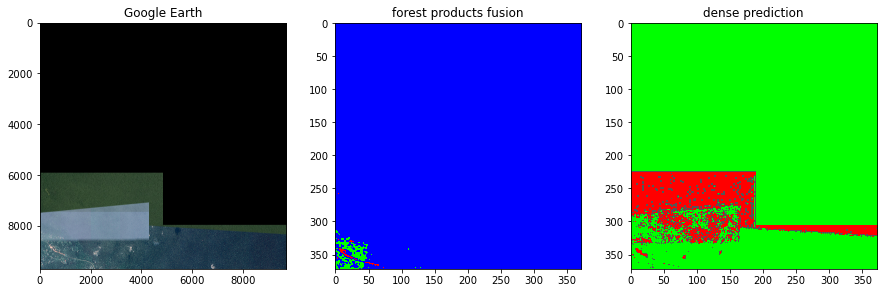


[Grid5d=529 Grid01d=66] Mon Dec 28 15:47:24 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=66: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:09<00:00,  5.85it/s]


prediction saved! path: ./densePred/densePred_529_66.tif



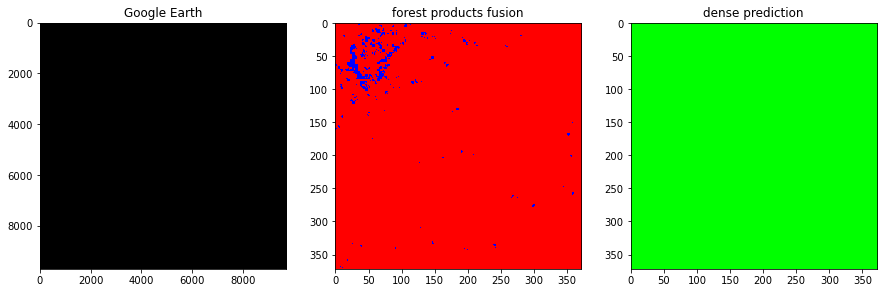


[Grid5d=529 Grid01d=67] Mon Dec 28 15:53:43 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=67: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:11<00:00,  5.82it/s]


prediction saved! path: ./densePred/densePred_529_67.tif



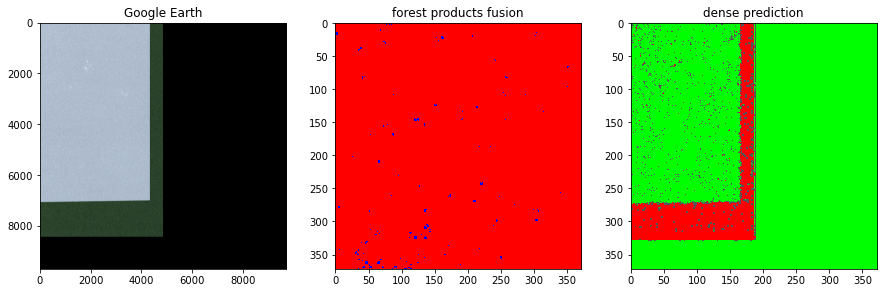


[Grid5d=529 Grid01d=68] Mon Dec 28 16:00:03 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=68: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:11<00:00,  5.83it/s]


prediction saved! path: ./densePred/densePred_529_68.tif



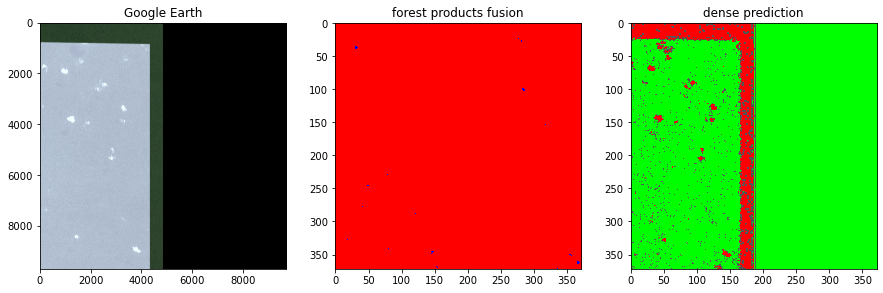


[Grid5d=529 Grid01d=69] Mon Dec 28 16:06:28 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=69: 100%|██████████████████████████████████████████████████████████████████| 2169/2169 [06:11<00:00,  5.84it/s]


prediction saved! path: ./densePred/densePred_529_69.tif



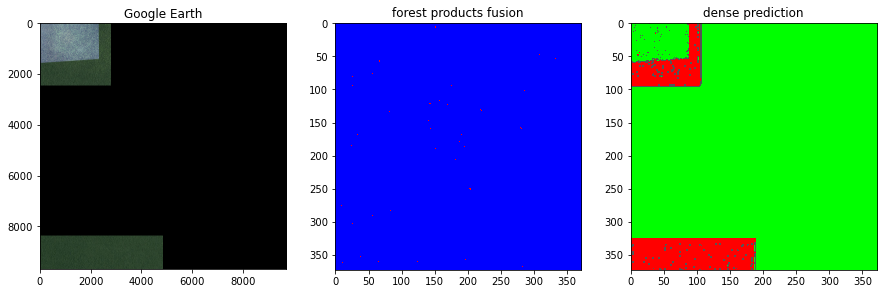


[Grid5d=529 Grid01d=70] Mon Dec 28 16:12:48 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=70: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:10<00:00,  5.84it/s]


prediction saved! path: ./densePred/densePred_529_70.tif



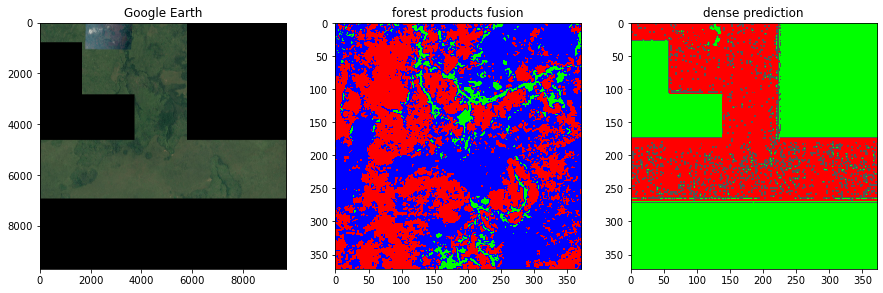


[Grid5d=529 Grid01d=71] Mon Dec 28 16:19:08 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=71: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:11<00:00,  5.82it/s]


prediction saved! path: ./densePred/densePred_529_71.tif



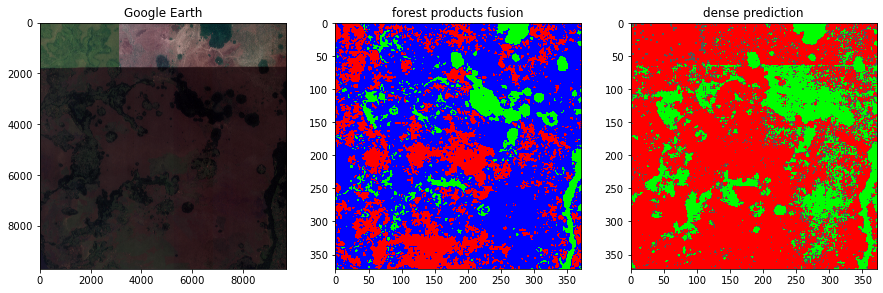


[Grid5d=529 Grid01d=72] Mon Dec 28 16:25:30 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=72: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:11<00:00,  5.83it/s]


prediction saved! path: ./densePred/densePred_529_72.tif



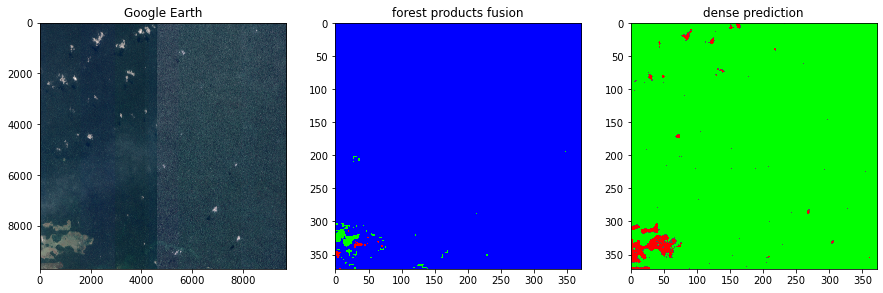


[Grid5d=529 Grid01d=73] Mon Dec 28 16:31:52 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=73: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:09<00:00,  5.85it/s]


prediction saved! path: ./densePred/densePred_529_73.tif



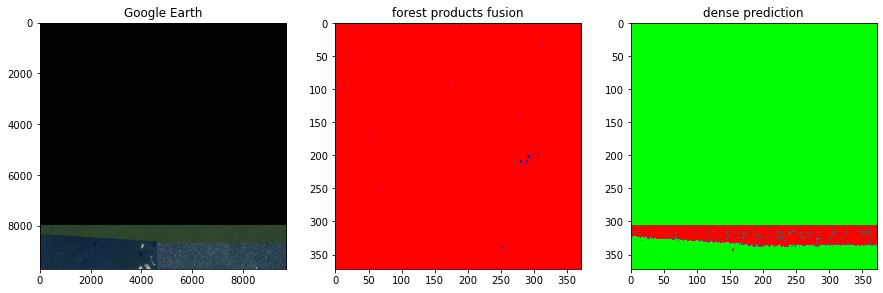


[Grid5d=529 Grid01d=74] Mon Dec 28 16:38:11 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=74: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:09<00:00,  5.86it/s]


prediction saved! path: ./densePred/densePred_529_74.tif



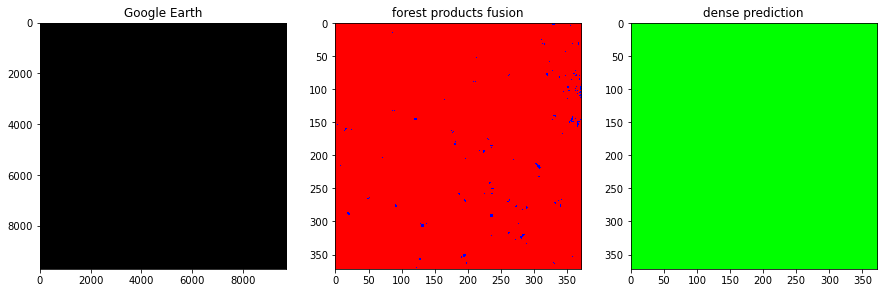


[Grid5d=529 Grid01d=75] Mon Dec 28 16:44:32 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=75: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:09<00:00,  5.86it/s]


prediction saved! path: ./densePred/densePred_529_75.tif



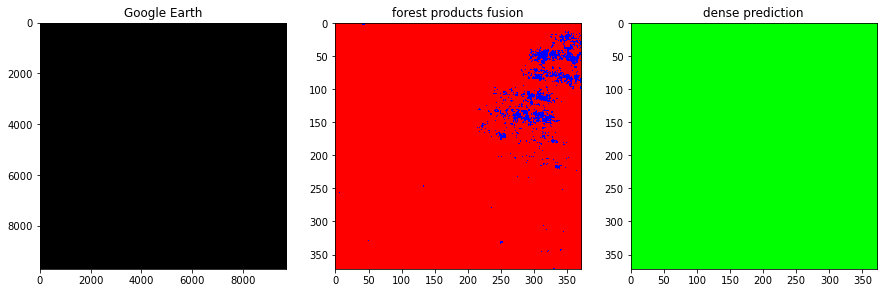


[Grid5d=529 Grid01d=76] Mon Dec 28 16:50:50 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=76: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:09<00:00,  5.86it/s]


prediction saved! path: ./densePred/densePred_529_76.tif



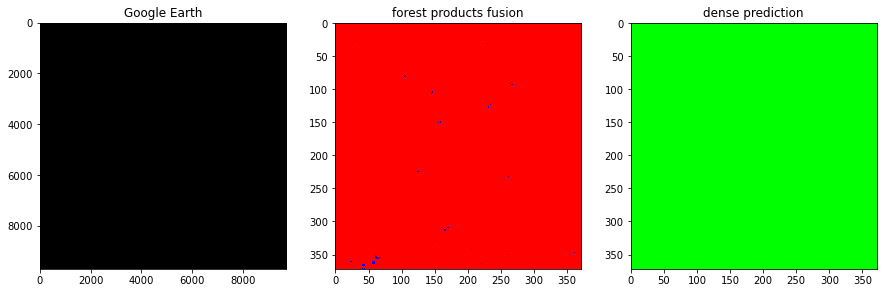


[Grid5d=529 Grid01d=77] Mon Dec 28 16:57:08 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=77: 100%|██████████████████████████████████████████████████████████████████| 2169/2169 [06:10<00:00,  5.86it/s]


prediction saved! path: ./densePred/densePred_529_77.tif



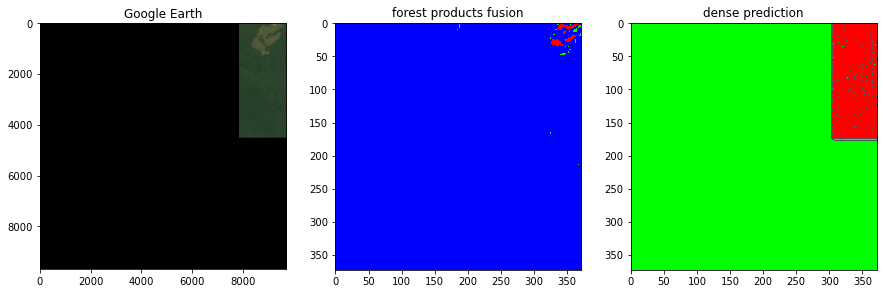


[Grid5d=529 Grid01d=78] Mon Dec 28 17:03:28 2020
--------------------------------------------------------------------------------
GE & FF data found, predicting started!


Grid01d=78: 100%|██████████████████████████████████████████████████████████████████| 2163/2163 [06:09<00:00,  5.86it/s]


prediction saved! path: ./densePred/densePred_529_78.tif



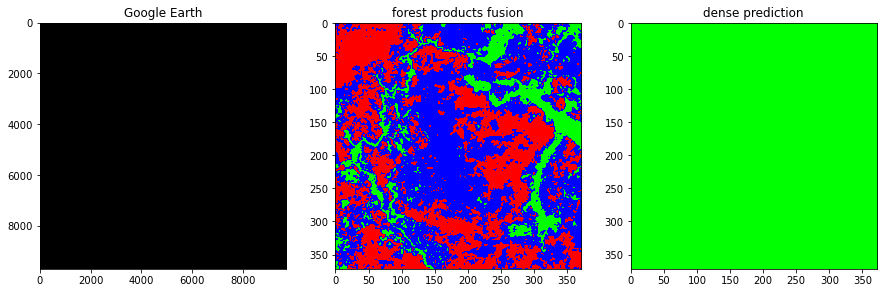

timeout: timed out

In [5]:
totalGrid = ee.FeatureCollection("users/sunly3456/globalGrids/globalGt60Grids/forest23gt60gridsAll")
totalGridIdxList = list(range(1, 100))

dataPath = r"E:/SZT/Data/Forest/densePredData"
predPath = r"./densePred"


# 按totalGridIdxList中的索引，依次预测对应0.1度格网
for gridIdx in totalGridIdxList:
    ID_5d = totalGrid.filterMetadata("orderID", "equals", gridIdx).first().getNumber("gridID").getInfo()
    fNamePostfix = "_%d_%d.tif" % (ID_5d, gridIdx)

    curFFPath = dataPath + "/FF01" + fNamePostfix
    curGEPath = dataPath + "/GE17" + fNamePostfix
    predSavePath = predPath + "/densePred" + fNamePostfix

    print("\n[Grid5d=%d Grid01d=%d] %s" % (ID_5d, gridIdx, time.ctime()))
    print("%s" % "-"*80)
    # 如果已经预测过，则跳过
    if os.path.exists(predSavePath):
        print("grid01d %d already processed, jump to next\n" % gridIdx)
        continue
    else:
        while(True):
            # 如果输入数据未准备好，则等待1分钟
            if not (os.path.exists(curGEPath) and os.path.exists(curFFPath)):
                print("GE or FF data not found, waiting for 60 sec...")
                time.sleep(60)
            # 如果输入数据已准备好，开始预测，并保存为GeoTiff
            else:
                print("GE & FF data found, predicting started!")
                time.sleep(2)
                ds = gdal.Open(curFFPath)
                imgW, imgH = ds.RasterXSize, ds.RasterYSize
                trans, proj = ds.GetGeoTransform(), ds.GetProjection()
                imgArray = ds.ReadAsArray(0, 0, imgW, imgH).copy()

                llList_all = common.getLonLatListFromArray(imgArray, trans)

                dataLoader = dataset.getLonLatDataLoader(llList_all[:, 0:2], local=True, imgSavePath=curGEPath, BSize=64, nWorkers=0, pinMem=True, APIKEY=None)
                pred = common.inference_densePred(model, dataLoader, device=torch.device('cuda:0'), pixelSize=(0.00026949, 0.00026949), desc="Grid01d=%d" % gridIdx)
                
                predImg = pred.cpu().numpy().reshape(1, imgH, imgW).astype(np.uint8)
                common.saveTiff(predImg, savePath=predSavePath, dtype=gdal.GDT_Byte, geo_trans=trans, geo_proj=proj, no_data=None)
                print("prediction saved! path: %s\n" % predSavePath)

                # 预览
                plt.figure(figsize=(15, 5))
                plt.subplot(1, 3, 1)
                plt.imshow(dataLoader.dataset.imgArray.transpose(1, 2, 0))
                plt.title("Google Earth")
                plt.subplot(1, 3, 2)
                imgArray[0, 0] = 6
                plt.imshow(imgArray, cmap=mpl.colors.ListedColormap(["#FF0000", "#FF0000", "#0000FF", "#0000FF", "#00FF00", "#00FF00"], "forestfusion", N=6))
                plt.title("forest products fusion")
                plt.subplot(1, 3, 3)
                predImg[0, 0, 0] = 5
                plt.imshow(predImg[0, :, :], cmap=mpl.colors.ListedColormap(["#00FF00", "#555555", "#FF0000", "#FF0000", "#0000FF"], "pred", N=5))
                plt.title("dense prediction")
                plt.show()

                # del ds
                # del dataLoader
                # gc.collect()
                # os.remove(curFFPath)
                # os.remove(curGEPath)

                break